In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from evaluation import evaluate_predictions
import pickle

Please read the markdowns for information and instruction around nearby code cells.

# DATA WRANGLING

In [57]:
def load_data(train_path, validation_path):
    df_train = pd.read_csv(train_path)
    df_validation = pd.read_csv(validation_path)

    return df_train, df_validation

Loading the data, pass the paths to train and validation data as arguments to the function, as shown below.

This script assumes that features present in both train and validation sets are identical. Since the 'hotwaterheating' feature is removed because of its redundancy, the test sets must also have that feature dropped for the script to run without any errors.

In [58]:
df_train, df_validation = load_data("housing_price_prediction/train.csv", "housing_price_prediction/validation.csv")

In [59]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,5250000
1,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,8540000
2,3520,2,1,2,yes,no,no,no,no,0,yes,furnished,4515000
3,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000
4,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000


In [60]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,3480,4,1,2,no,no,no,no,no,1,no,semi-furnished,3290000
1,2015,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished,3850000
2,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished,4025000
3,6000,3,2,4,yes,yes,no,no,yes,1,no,furnished,7210000
4,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [61]:
df_train.shape

(381, 13)

In [62]:
df_validation.shape

(82, 13)

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              381 non-null    int64 
 1   bedrooms          381 non-null    int64 
 2   bathrooms         381 non-null    int64 
 3   stories           381 non-null    int64 
 4   mainroad          381 non-null    object
 5   guestroom         381 non-null    object
 6   basement          381 non-null    object
 7   hotwaterheating   381 non-null    object
 8   airconditioning   381 non-null    object
 9   parking           381 non-null    int64 
 10  prefarea          381 non-null    object
 11  furnishingstatus  381 non-null    object
 12  price             381 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 38.8+ KB


In [64]:
df_validation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              82 non-null     int64 
 1   bedrooms          82 non-null     int64 
 2   bathrooms         82 non-null     int64 
 3   stories           82 non-null     int64 
 4   mainroad          82 non-null     object
 5   guestroom         82 non-null     object
 6   basement          82 non-null     object
 7   hotwaterheating   82 non-null     object
 8   airconditioning   82 non-null     object
 9   parking           82 non-null     int64 
 10  prefarea          82 non-null     object
 11  furnishingstatus  82 non-null     object
 12  price             82 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 8.5+ KB


In [65]:
print(f"Train:\n{df_train.isnull().sum()}\n\nValidation:\n{df_validation.isnull().sum()}")

Train:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

Validation:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [66]:
print(f"Train:\n{df_train.duplicated().sum()}\n\nValidation:\n{df_validation.duplicated().sum()}")

Train:
0

Validation:
0


In [67]:
# Using label encoding
def label_encoder(df):
    list_to_encode = [name for name in df.columns if df[name].dtype == 'object'] # and name != 'furnishingstatus']
    label_encoder = LabelEncoder()
    for name in list_to_encode:
        df[name] = label_encoder.fit_transform(df[name])
    return df

In [68]:
df_train = label_encoder(df_train)
df_validation = label_encoder(df_validation)

In [69]:
# The encoded dataframes
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,1,1,0,0,0,2,0,1,5250000
1,6540,4,2,2,1,1,1,0,1,2,1,0,8540000
2,3520,2,1,2,1,0,0,0,0,0,1,0,4515000
3,8250,3,1,1,1,0,0,0,0,0,0,0,4480000
4,3180,4,1,2,1,0,1,0,1,0,0,2,3290000


In [70]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,3480,4,1,2,0,0,0,0,0,1,0,1,3290000
1,2015,3,1,2,1,0,1,0,0,0,1,1,3850000
2,5400,3,1,1,1,0,0,0,0,3,0,1,4025000
3,6000,3,2,4,1,1,0,0,1,1,0,0,7210000
4,2910,3,1,1,0,0,0,0,0,0,0,0,1750000


From observations of data wrangling we can see that, there are no null values in the features nor any duplicates. 

# EDA

Visualization 

In [71]:
# Function for Histplot
def hist_plot(df, data):
    print(f"Histplots for {data} data:\n")
    
    for i in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[i], kde = True)
        plt.title(f"Histogram of {i}")
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [72]:
# Function for boxplot
def box_plot(df, data):
    print(f"Boxplots for {data} data:\n")

    for i in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

Histplots for train data:



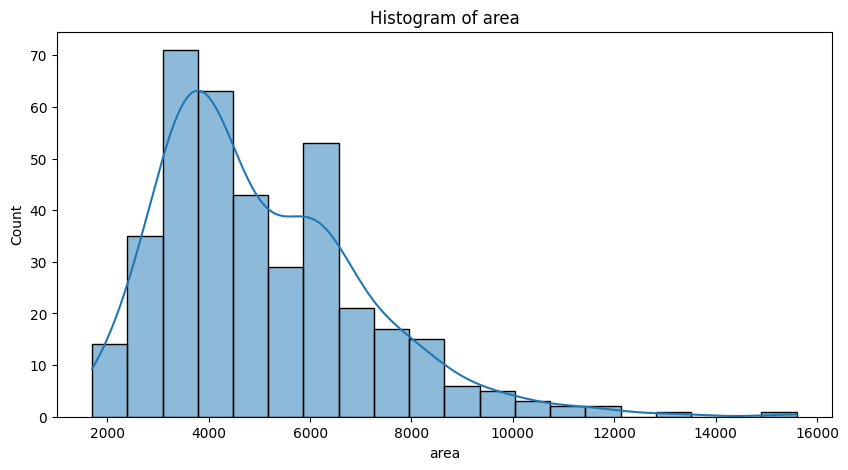

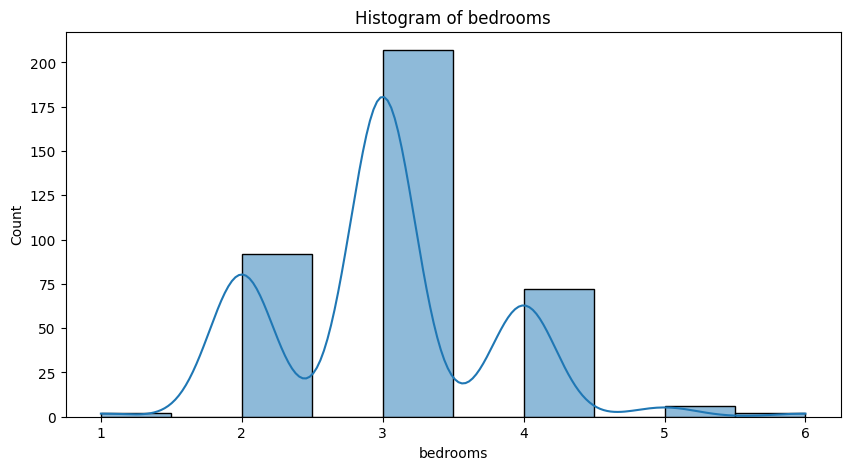

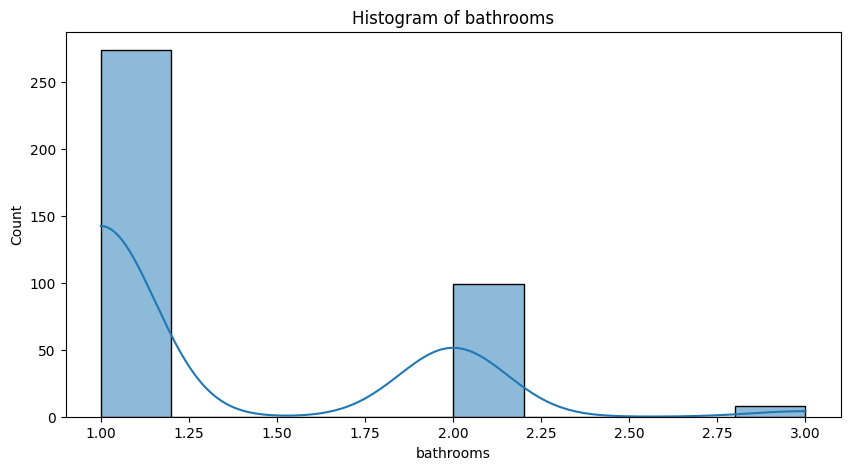

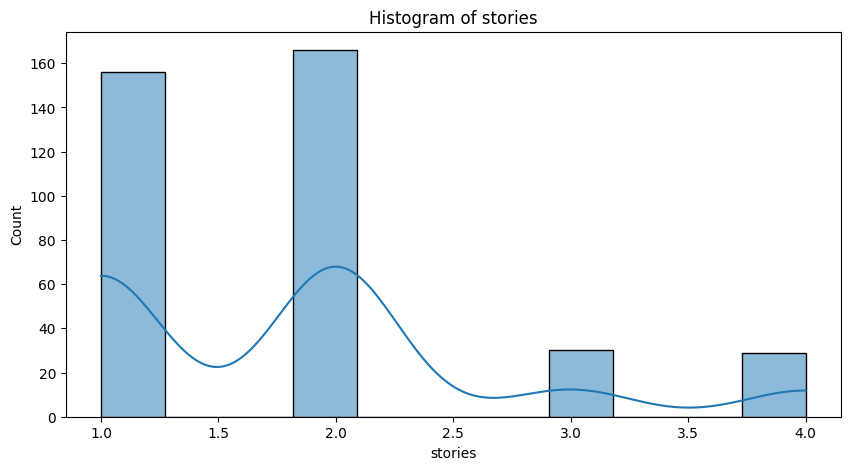

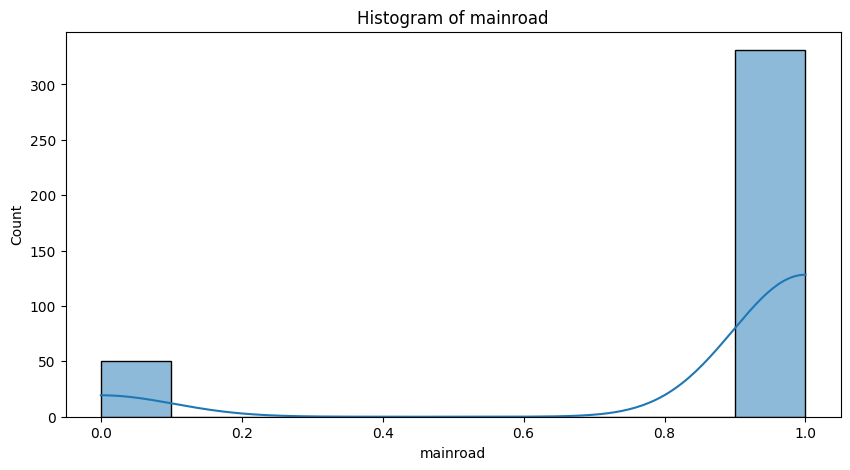

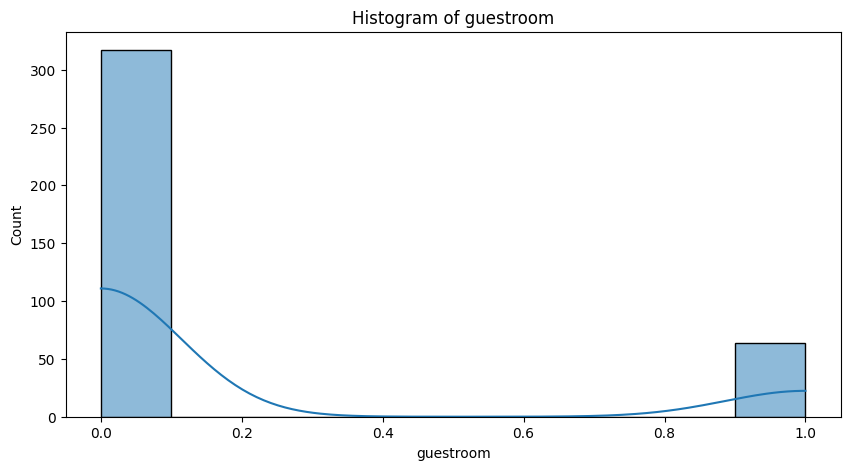

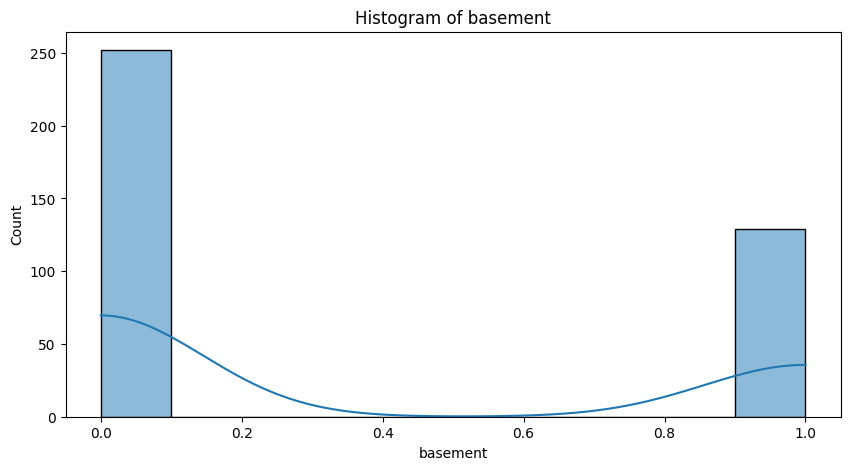

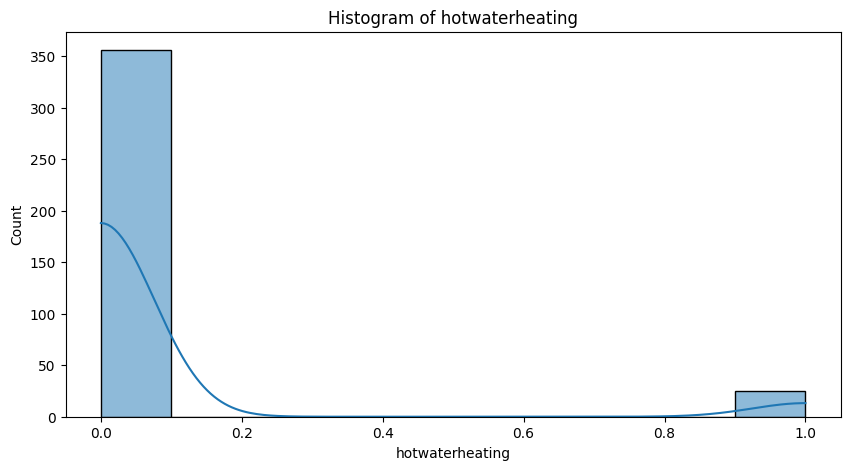

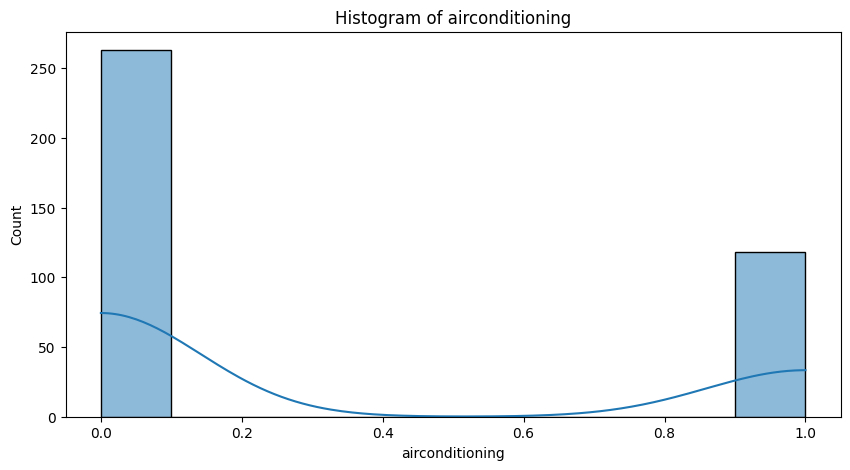

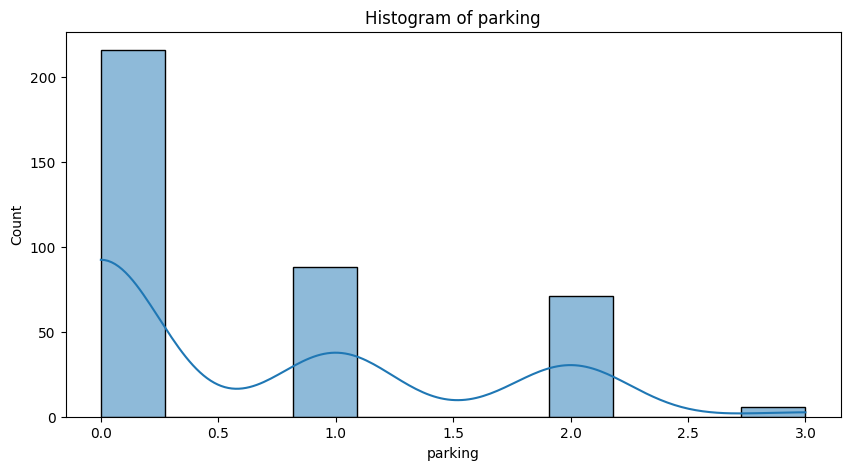

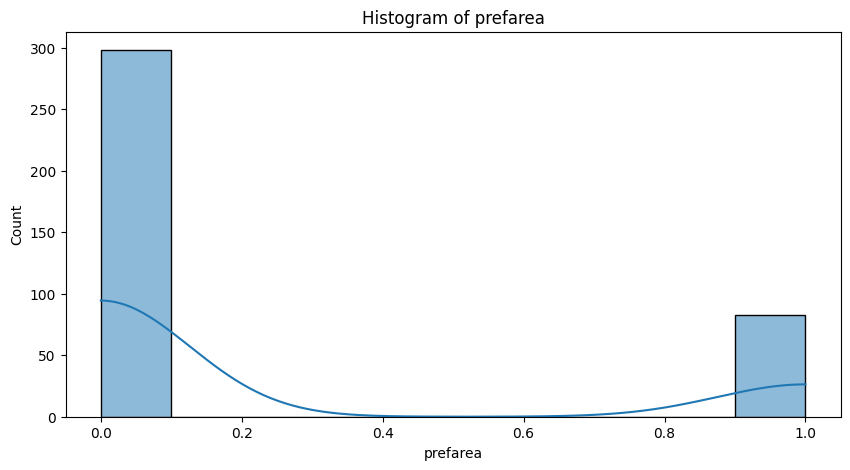

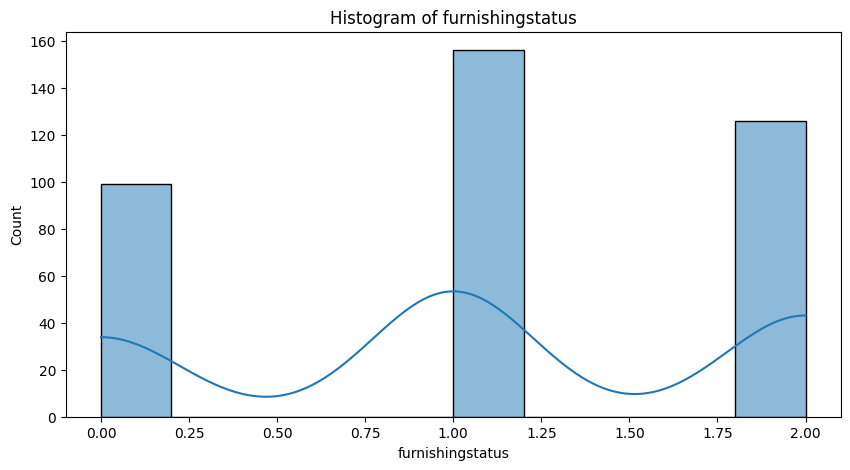

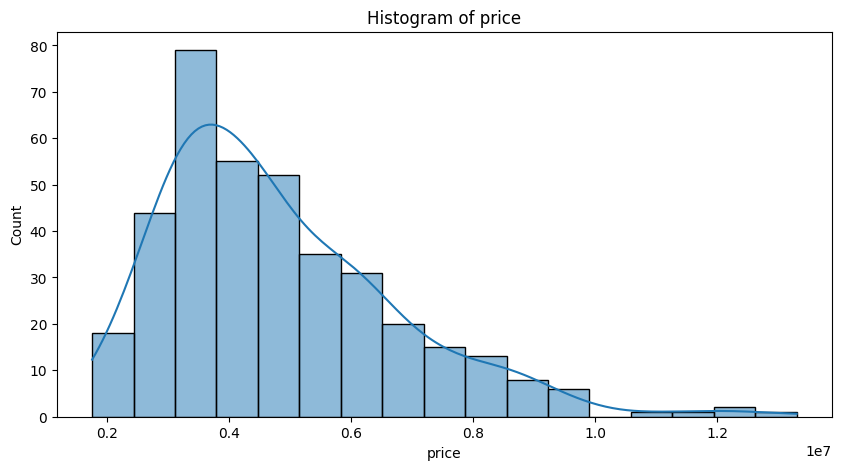

In [73]:
hist_plot(df_train, 'train')

Histplots for validation data:



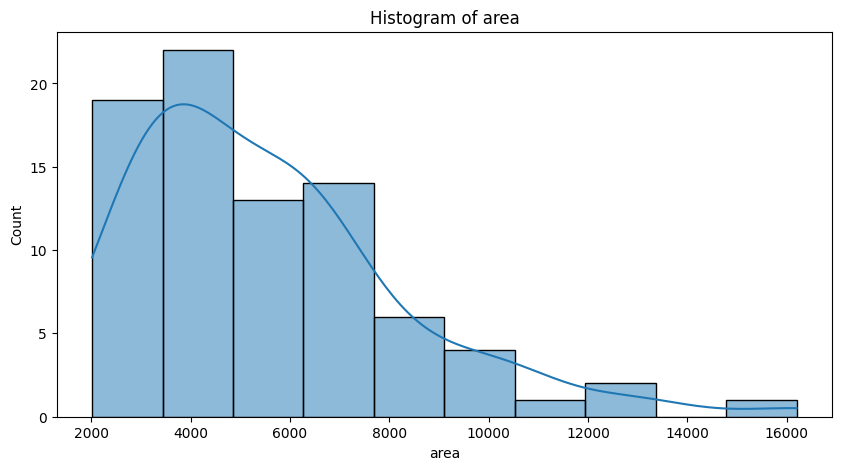

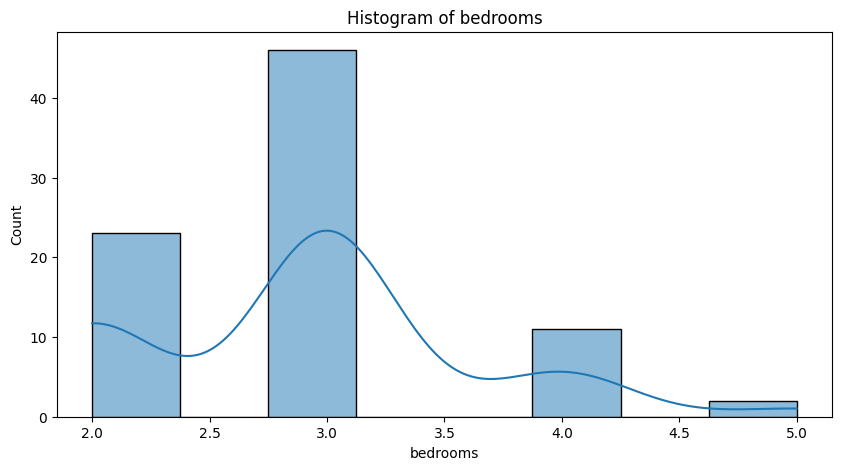

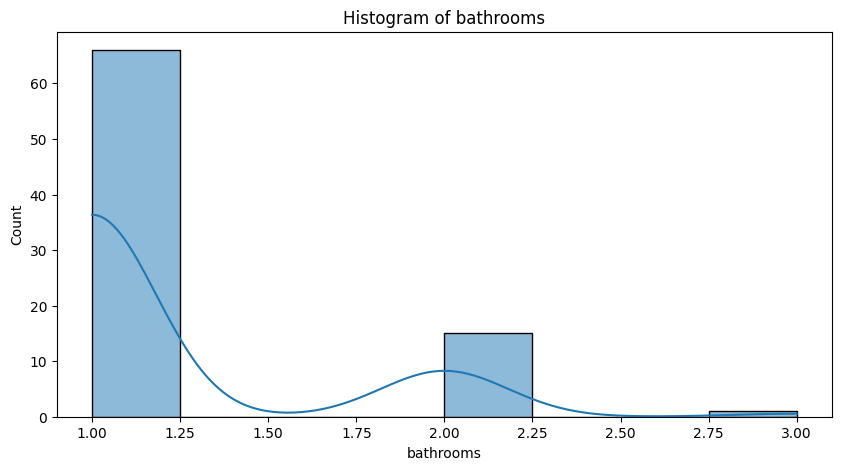

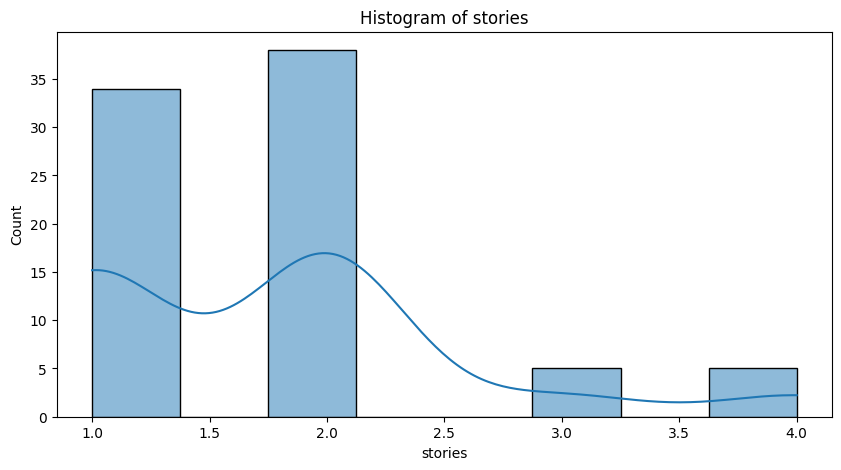

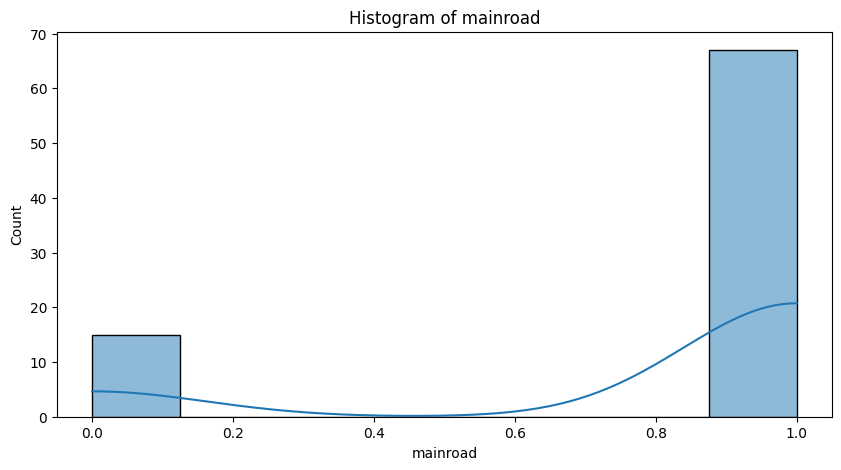

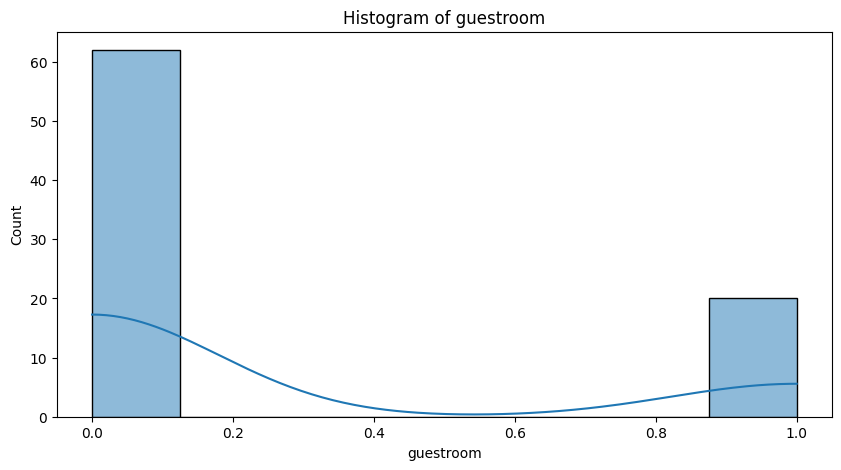

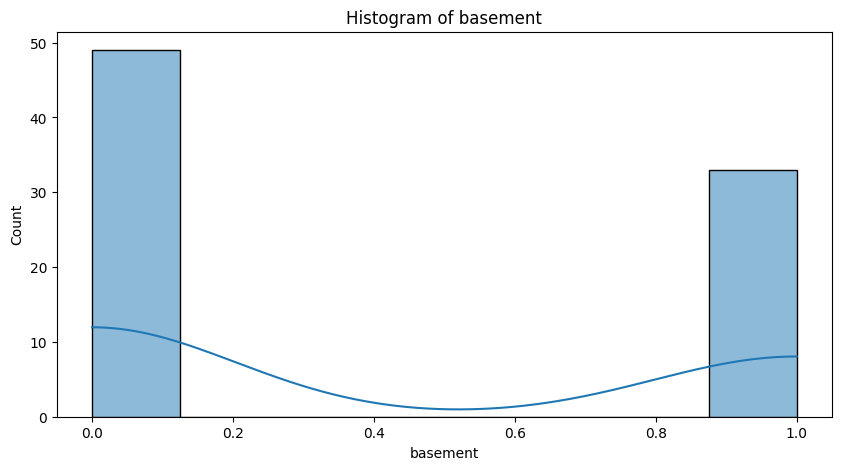

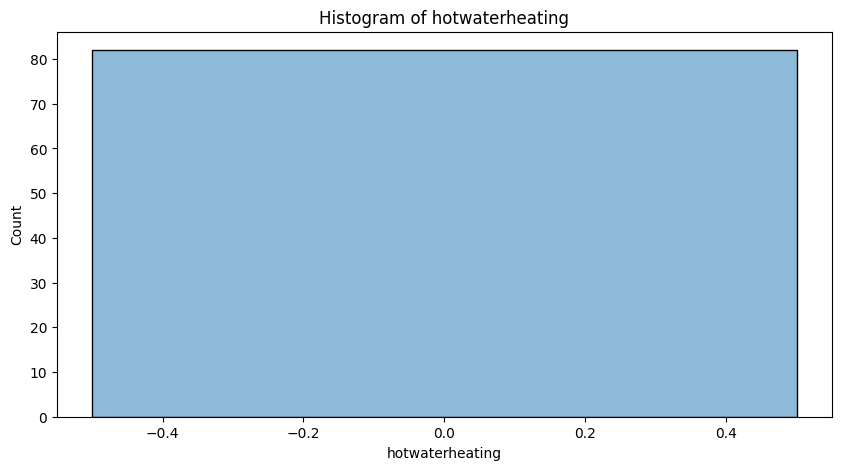

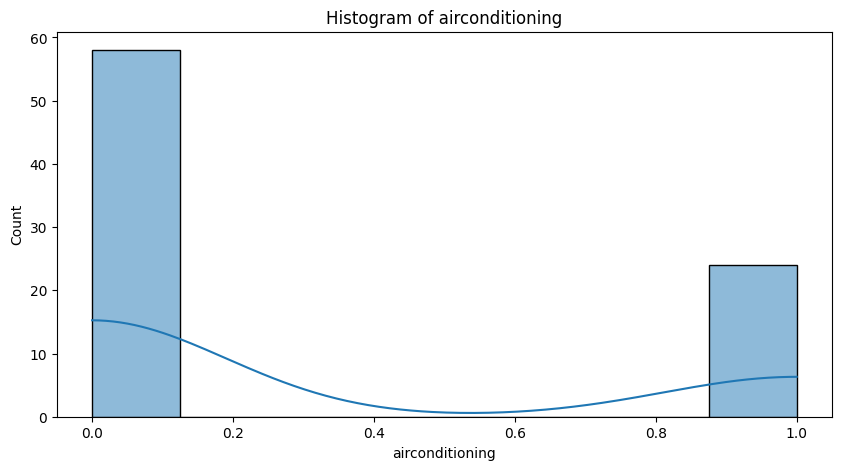

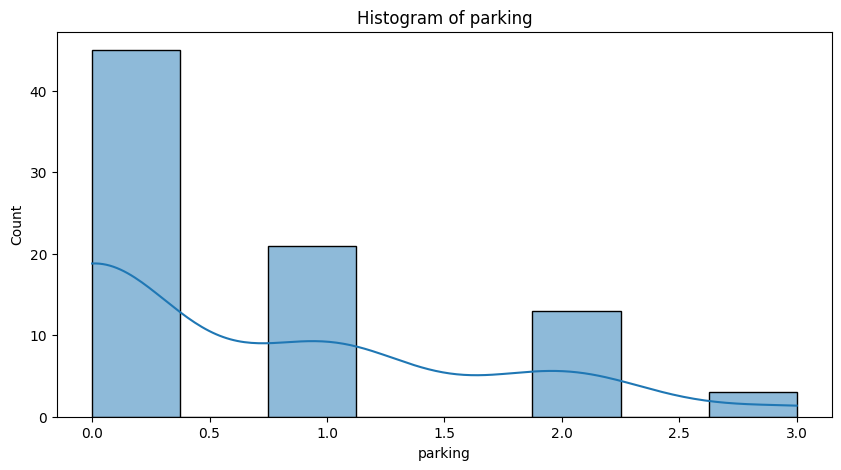

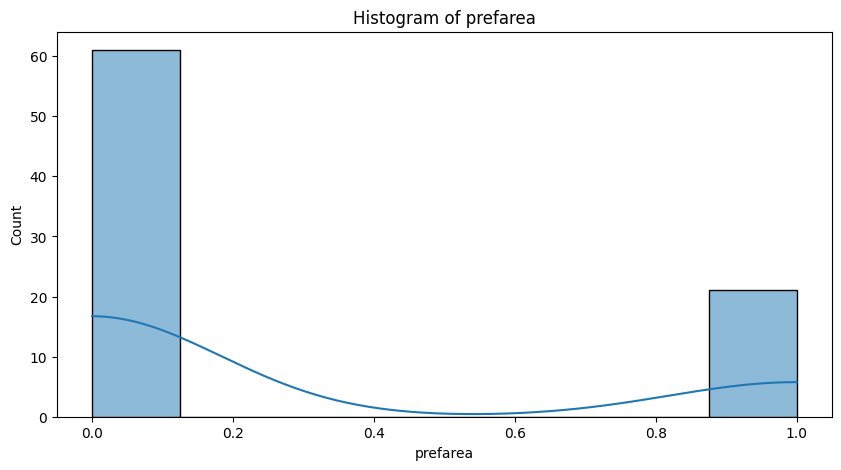

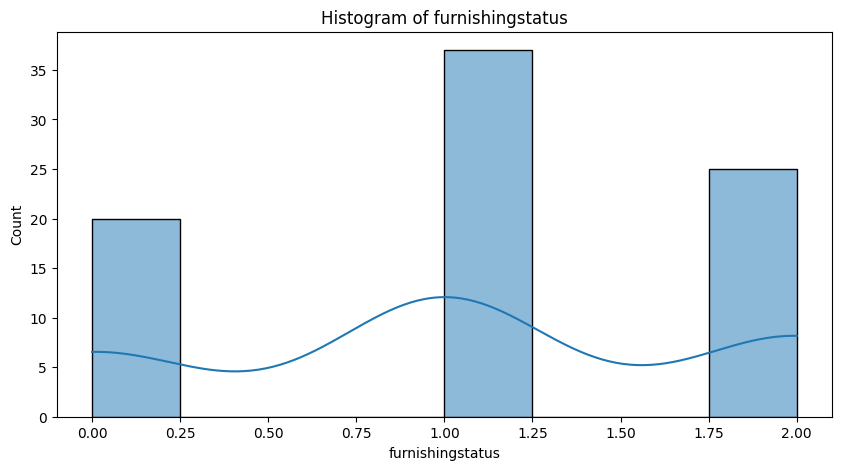

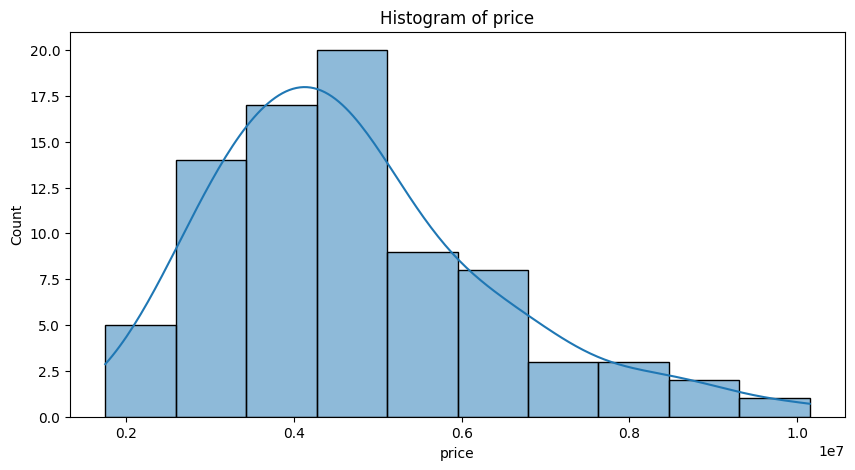

In [74]:
hist_plot(df_validation, 'validation')

Boxplots for train data:



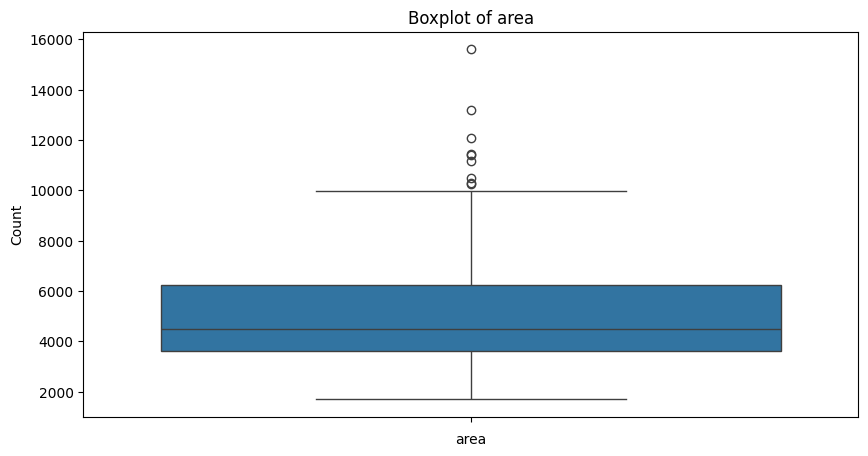

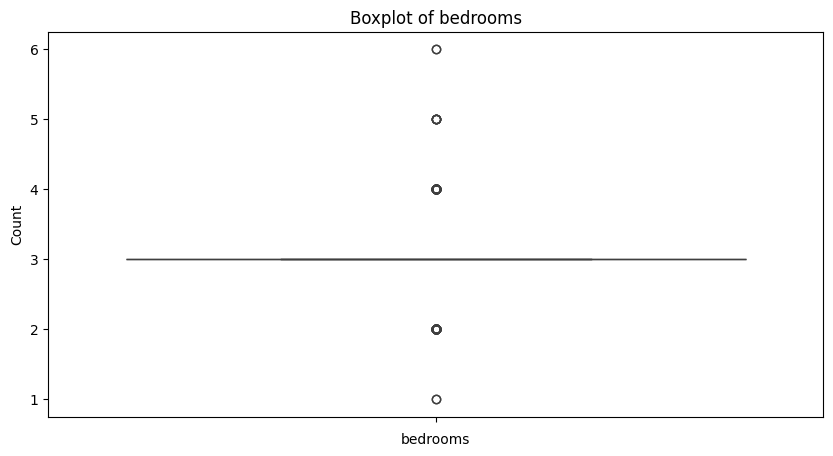

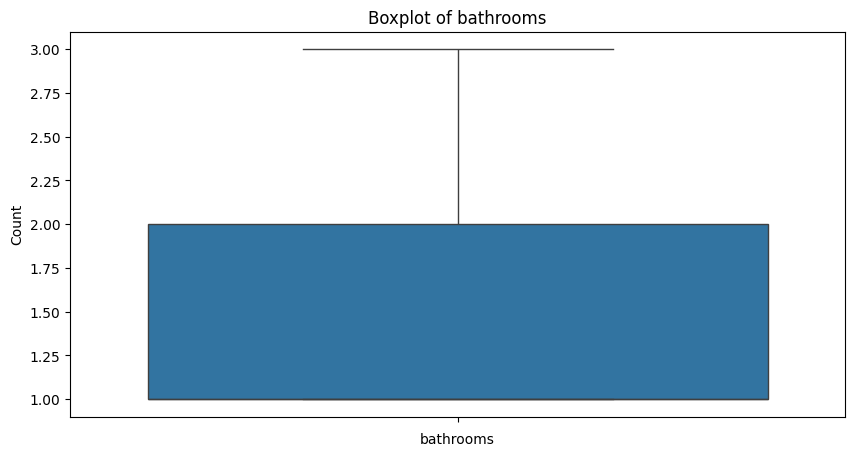

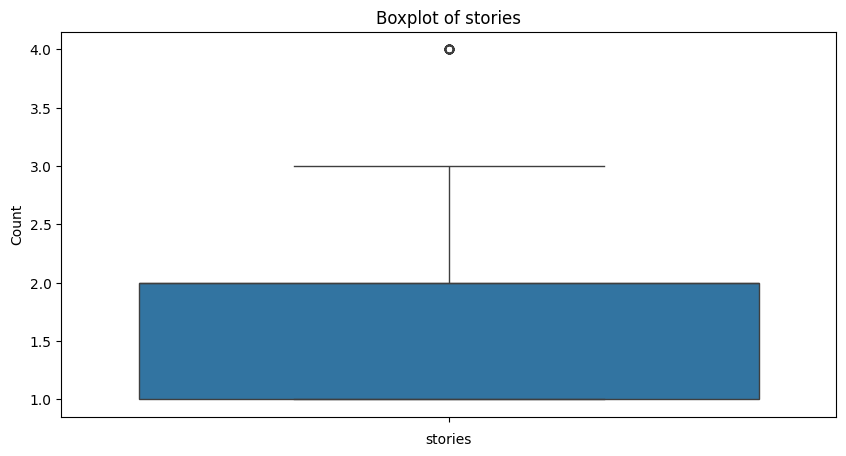

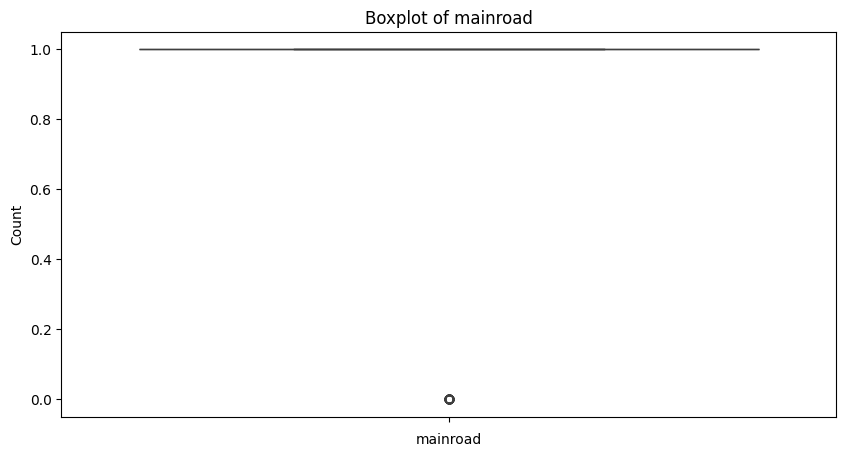

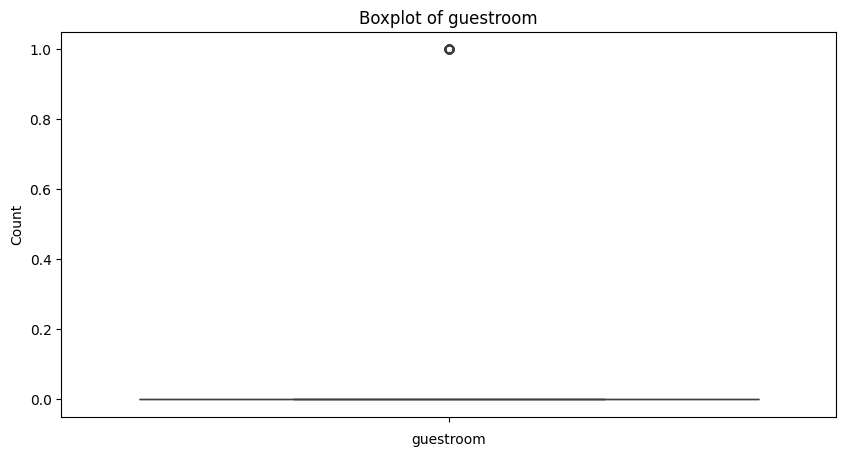

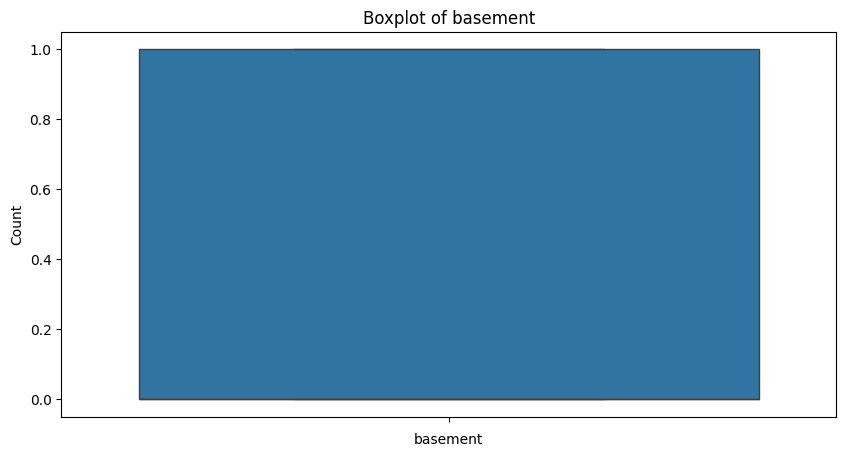

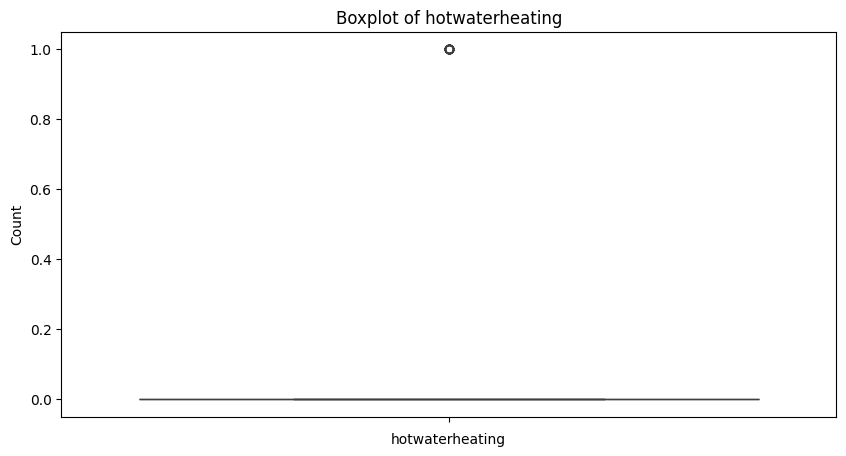

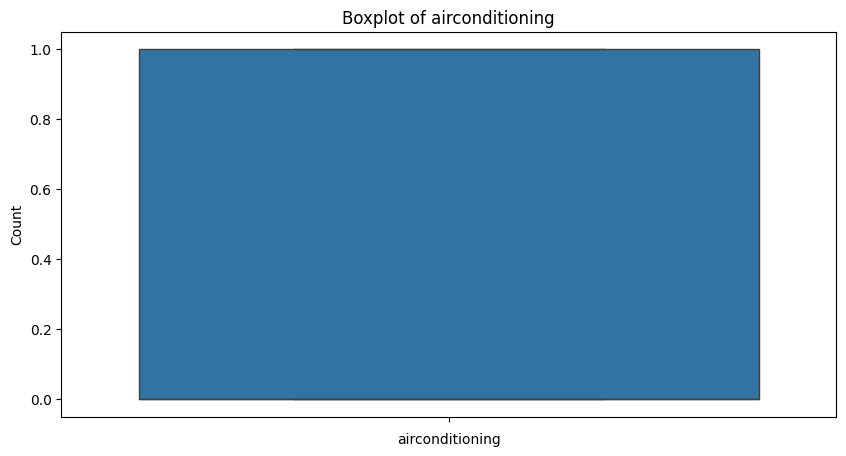

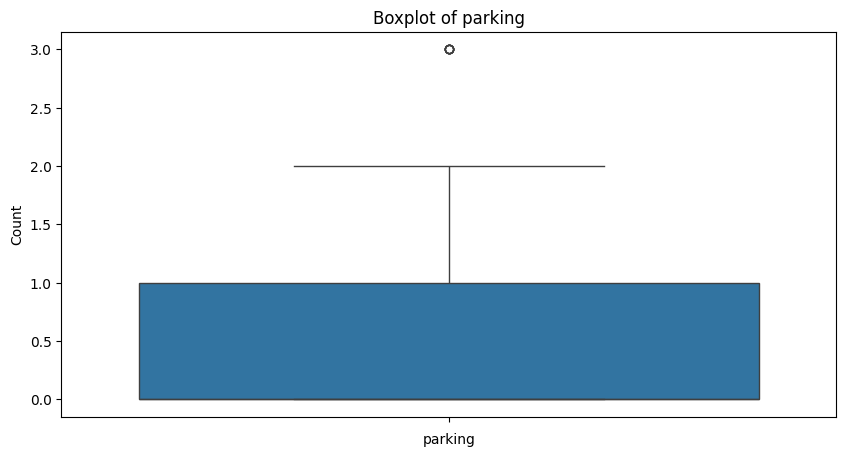

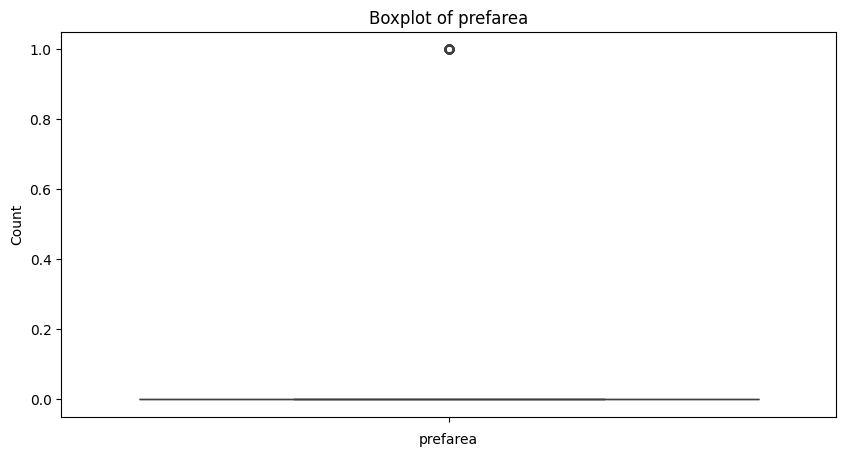

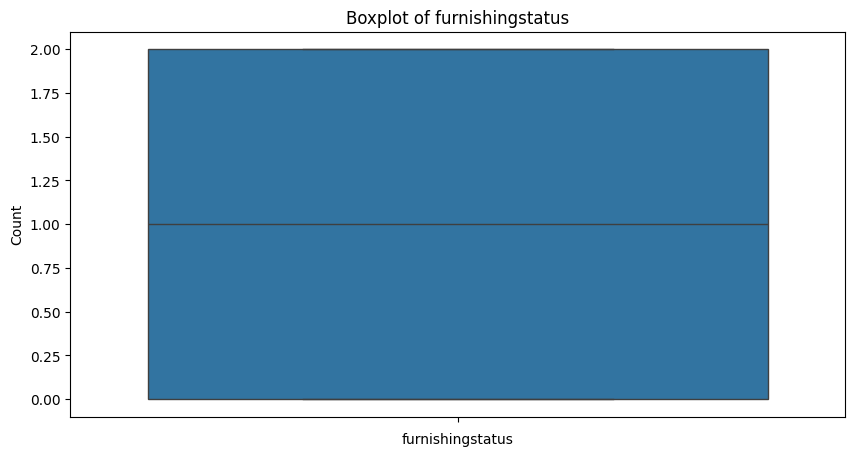

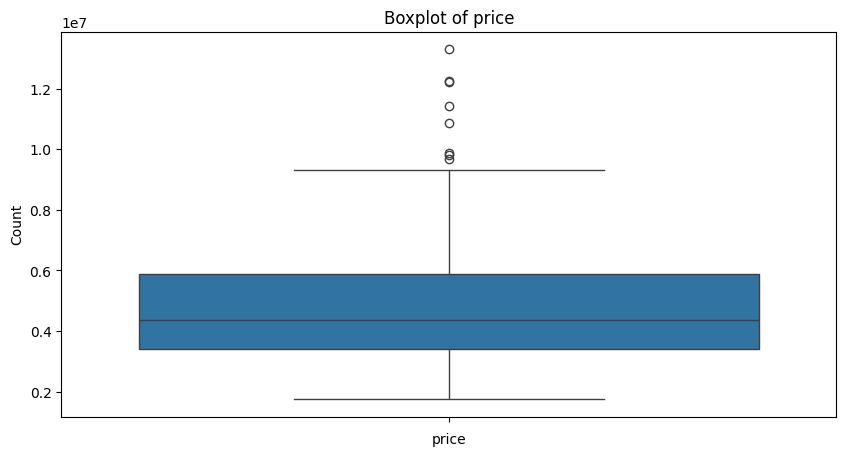

In [75]:
box_plot(df_train, 'train')

Boxplots for validation data:



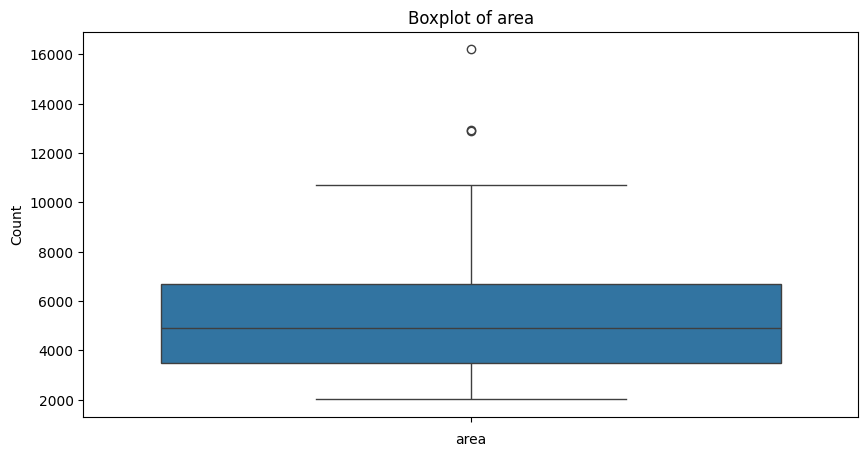

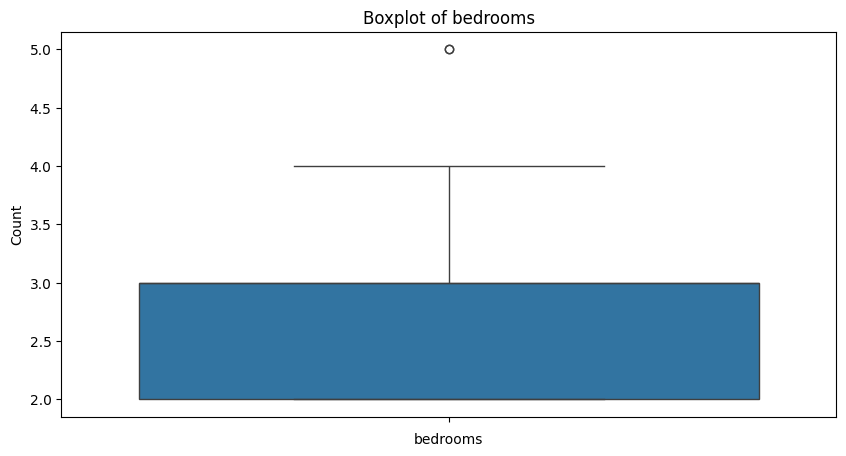

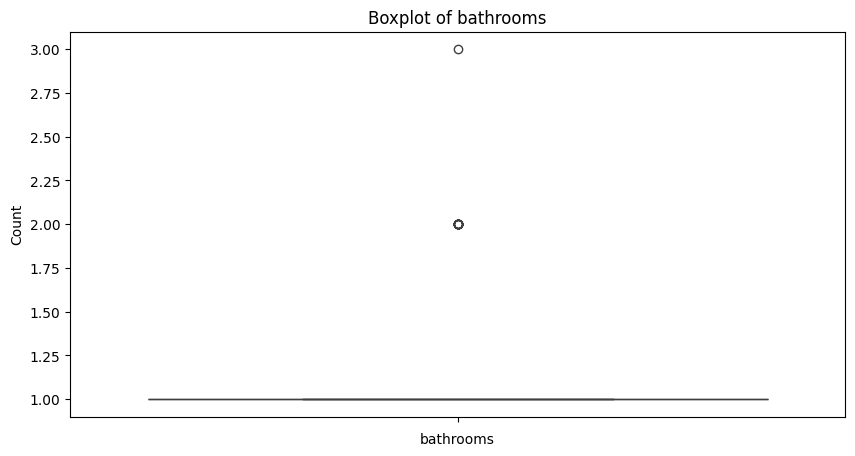

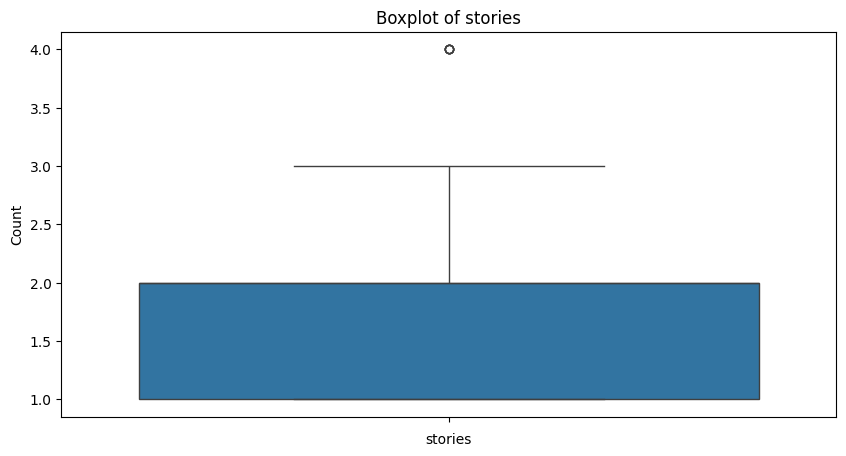

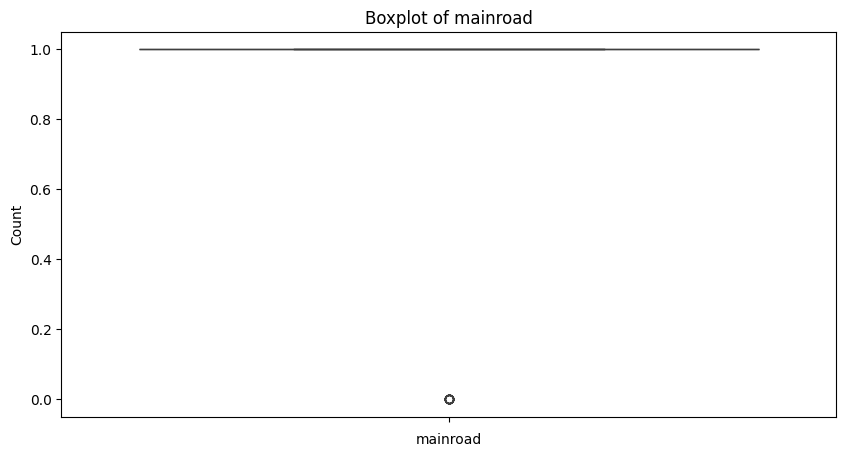

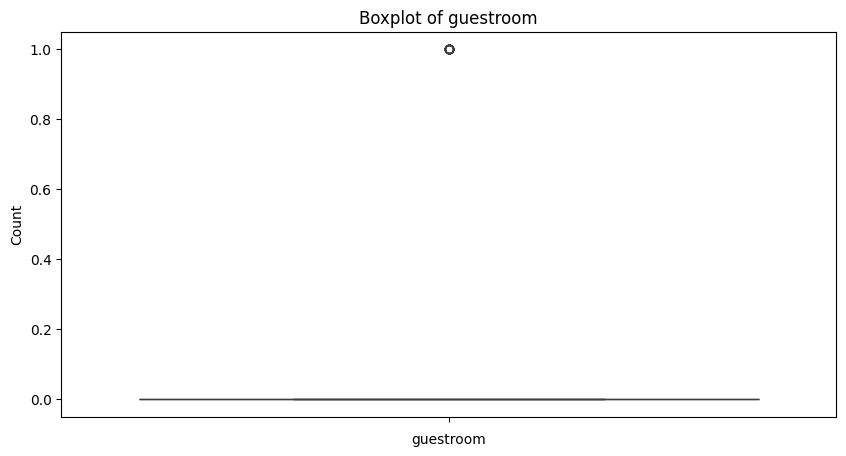

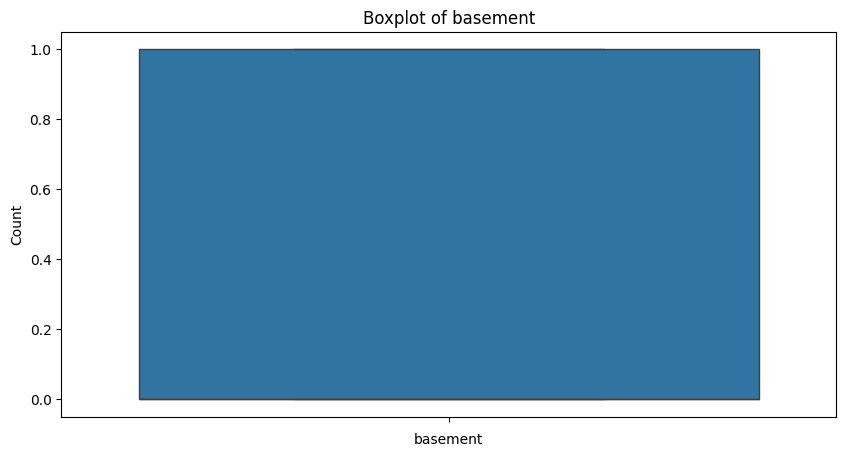

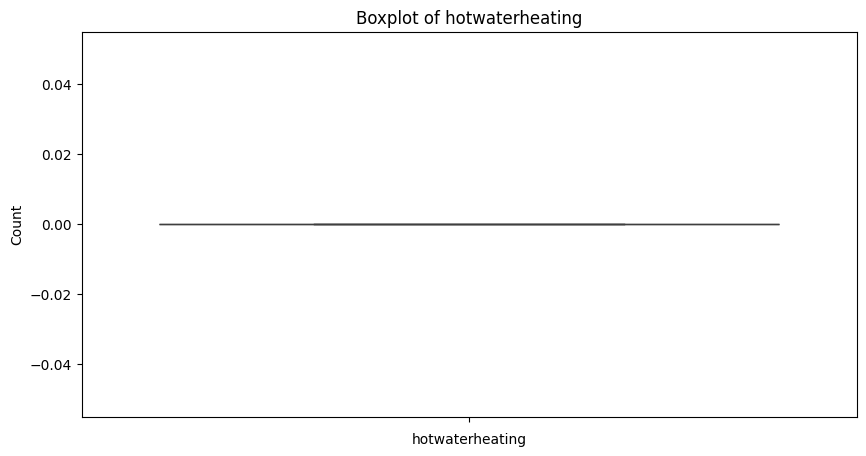

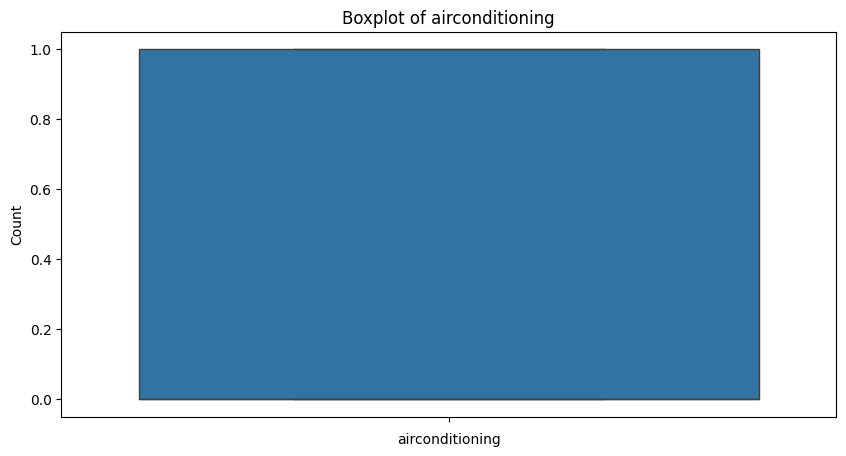

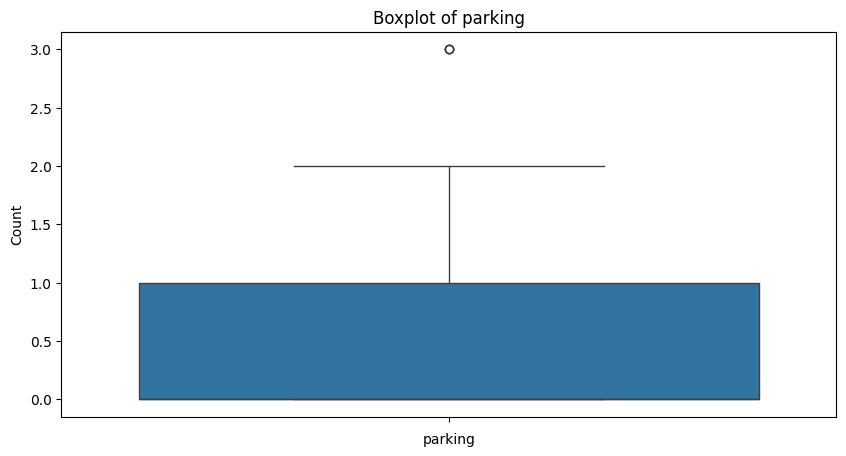

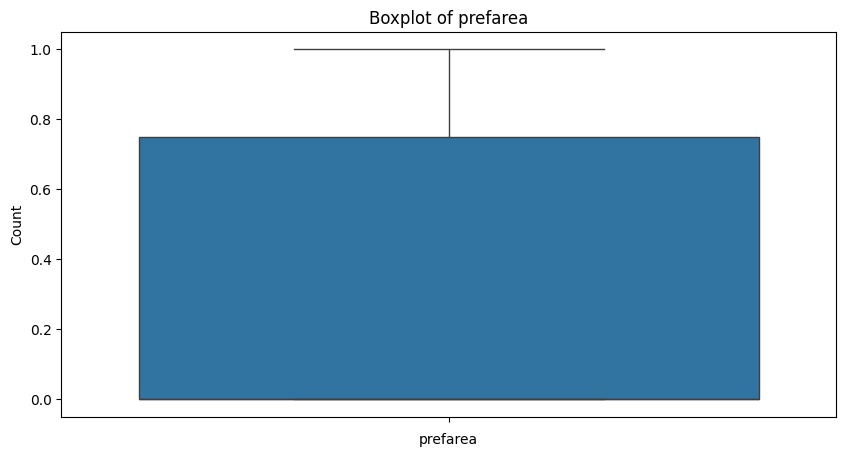

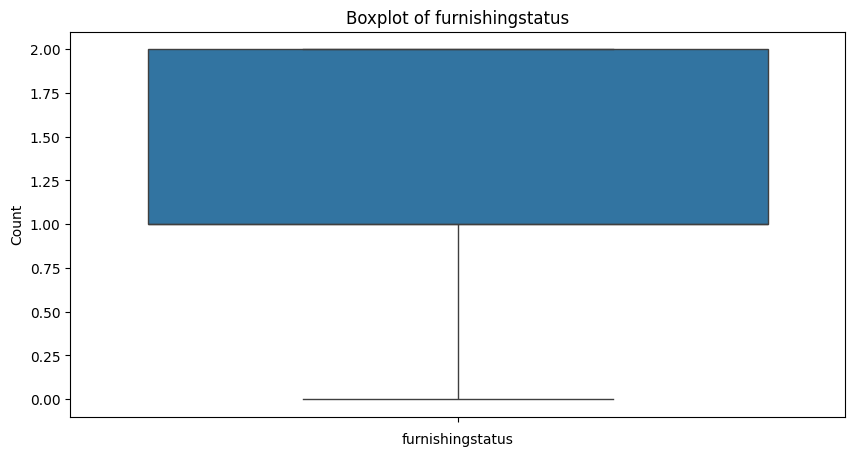

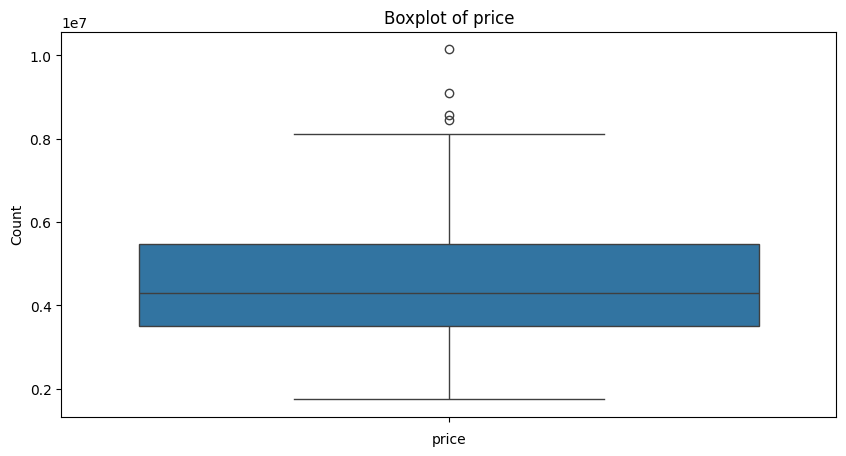

In [76]:
box_plot(df_validation, 'validation')

The feature "hotwaterheating" is heavily imbalanced in training set and only single category of the feature (0) is present in validation set. So, dropping the feature would be more effective.

In [77]:
df_train = df_train.drop("hotwaterheating", axis = 1)
df_validation = df_validation.drop("hotwaterheating", axis =1)

Reducing skew of some features

In [78]:
# Before transformation
# df_train.skew()

In [79]:
# df_validation.skew()

Since most input features are non-numeric, reducing the skewness wasn't really helpful.

In [80]:
# df_train['area'] = np.log1p(df_train['area'])
# df_train['price'] = np.log1p(df_train['price'])

# df_validation['area'] = np.log1p(df_validation['area'])
# df_validation['price'] = np.log1p(df_validation['price'])

However, while attempting to reduce the skewness of compatiable features like Area and Price. The model ended up performing worse.

In [81]:
# After transformation, the cell needs to be uncollapsed to check output
# df_train.skew()

In [82]:
# df_validation.skew()

Scaling Area

In [83]:
scaler = StandardScaler()

# df_train['area'] = scaler.fit_transform(df_train[['area']])
# df_validation['area'] = scaler.fit_transform(df_validation[['area']])

# df_train['price'] = scaler.fit_transform(df_train[['price']])
# df_validation['price'] = scaler.fit_transform(df_validation[['price']])

Similar to reducing skewness, using a StandardScaler to scale features like area and price also didn't have any major impact in model performance.

In [84]:
# Scaled dataframes
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,1,1,0,0,2,0,1,5250000
1,6540,4,2,2,1,1,1,1,2,1,0,8540000
2,3520,2,1,2,1,0,0,0,0,1,0,4515000
3,8250,3,1,1,1,0,0,0,0,0,0,4480000
4,3180,4,1,2,1,0,1,1,0,0,2,3290000


In [85]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
0,3480,4,1,2,0,0,0,0,1,0,1,3290000
1,2015,3,1,2,1,0,1,0,0,1,1,3850000
2,5400,3,1,1,1,0,0,0,3,0,1,4025000
3,6000,3,2,4,1,1,0,1,1,0,0,7210000
4,2910,3,1,1,0,0,0,0,0,0,0,1750000


In [86]:
# Heat Map
def heatmap_all(df, data):
    print(f"Heatmap for {data} data:\n")
    
    plt.figure(figsize = (12, 8))
    sns.heatmap(df.corr(), annot = True)
    plt.show()

Heatmap for train data:



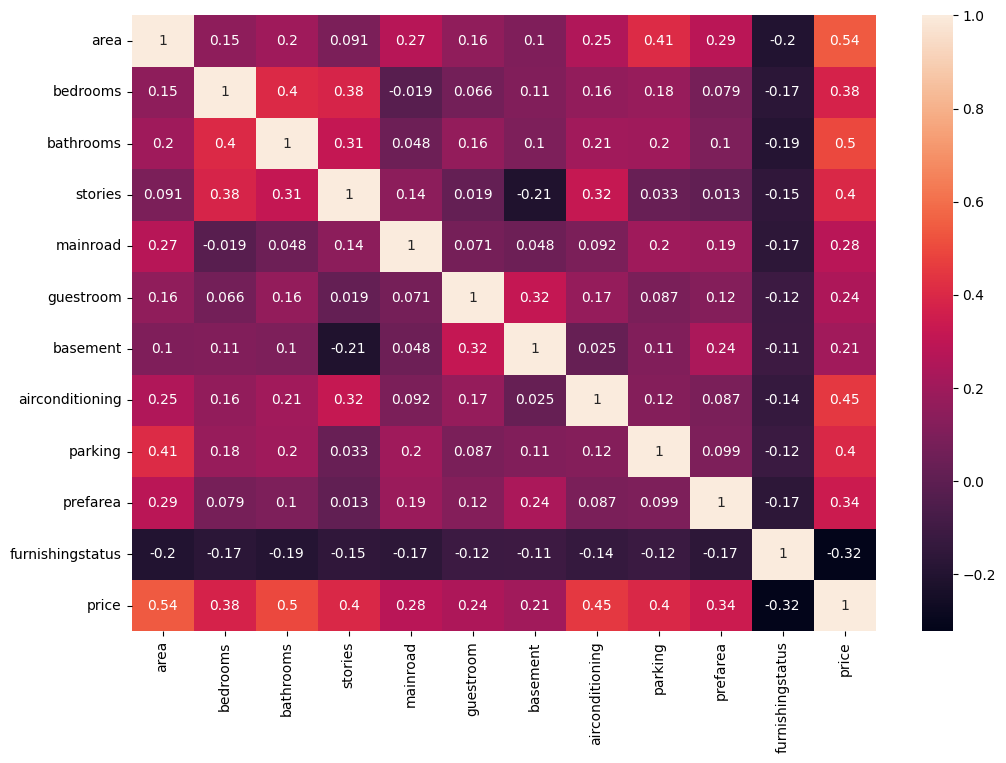

In [87]:
heatmap_all(df_train, "train")

Heatmap for validation data:



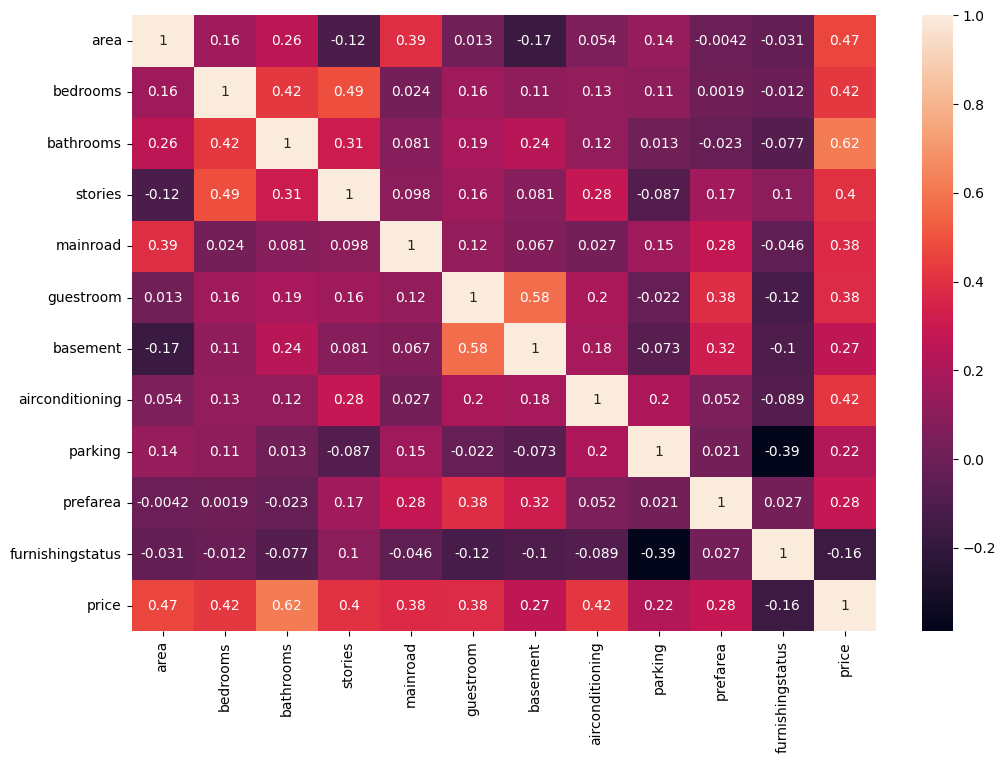

In [88]:
heatmap_all(df_validation, "validation")

# Feature Engineering

In [89]:
# Based on heatmap correlation

# Adding new features

# df_train['total_bhk'] = df_train['bedrooms'] + df_train['bathrooms'] + df_train['stories']
# df_validation['total_bhk'] = df_validation['bedrooms'] + df_validation['bathrooms'] + df_validation['stories']

# df_train['stories_airconditioning'] = df_train['airconditioning'] * df_train['stories']
# df_validation['stories_airconditioning'] = df_validation['airconditioning'] * df_validation['stories']

# df_train['parking_to_area_inv'] = df_train['parking'] / df_train['area']
# df_validation['parking_to_area_inv'] = df_validation['parking'] / df_validation['area']

# df_train['area_to_stories'] = df_train['area'] / df_train['stories']
# df_validation['area_to_stories'] = df_validation['area'] / df_validation['stories']

Observing the correlation provided by heatmap and some domain knowledge, new features were created, they are commented in the above cell.

Polynomial Features - Squaring

In [90]:
# df_train['area_sq'] = df_train['area']**2
# df_validation['area_sq'] = df_validation['area']**2

# df_train['parking_sq'] = df_train['parking']**2
# df_validation['parking_sq'] = df_validation['parking']**2

Some numeric features were changed to polynomial features by method of squaring.

In [91]:
# df_train = df_train.drop(['stories', 'bedrooms', 'area', 'parking'], axis = 1)
# df_validation = df_validation.drop(['stories', 'bedrooms', 'area', 'parking'], axis = 1)

Some features involved in feature engineering had to be removed to avoid multicolinearity. However, even after ample testing. The model performance was affected by the feature engineering done above.

# Data spliting and model training

In [92]:
# Input features and target feature
def split_data(df_train, df_validation):
    X_train = df_train.drop("price", axis = 1)
    y_train = df_train['price']

    X_valid = df_validation.drop('price', axis =1)
    y_valid = df_validation['price']

    return X_train, y_train, X_valid, y_valid

In [93]:
X_train, y_train, X_valid, y_valid = split_data(df_train, df_validation)

In [94]:
# Using random forest regressor 
rf_model = RandomForestRegressor(n_estimators=50, random_state=66)

# Fitting 
rf_model.fit(X_train, y_train)

# Predicting
y_pred = rf_model.predict(X_valid)

# Evaluation
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

R2 Score: 0.7242354820683171


In [95]:
# Saving model as pickle file
with open('Saved_Models/rf_model_66.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as pickle file.")

Model saved as pickle file.


In [96]:
# Loading the pickle file 
with open('Saved_Models/rf_model_66.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded from pickle file.")

Model loaded from pickle file.


In [97]:
# For evaluation:
# Evaluate the predictions
metrics = evaluate_predictions(y_valid, y_pred)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 676620.1423
MSE: 750632727517.2426
RMSE: 866390.6322
R2: 0.7242
